In [1]:
import gym
import minihack
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as display

In [2]:
from utils import *
from algorithms import bfs, a_star
import genetic_algorithm

In [26]:
!python -m minihack.scripts.env_list

1225.15s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


MiniHack-Room-5x5-v0
MiniHack-Room-Random-5x5-v0
MiniHack-Room-Dark-5x5-v0
MiniHack-Room-Monster-5x5-v0
MiniHack-Room-Trap-5x5-v0
MiniHack-Room-Ultimate-5x5-v0
MiniHack-Room-15x15-v0
MiniHack-Room-Random-15x15-v0
MiniHack-Room-Dark-15x15-v0
MiniHack-Room-Monster-15x15-v0
MiniHack-Room-Trap-15x15-v0
MiniHack-Room-Ultimate-15x15-v0
MiniHack-Corridor-R2-v0
MiniHack-Corridor-R3-v0
MiniHack-Corridor-R5-v0
MiniHack-KeyRoom-Fixed-S5-v0
MiniHack-KeyRoom-S5-v0
MiniHack-KeyRoom-S15-v0
MiniHack-KeyRoom-Dark-S5-v0
MiniHack-KeyRoom-Dark-S15-v0
MiniHack-MazeWalk-9x9-v0
MiniHack-MazeWalk-Mapped-9x9-v0
MiniHack-MazeWalk-15x15-v0
MiniHack-MazeWalk-Mapped-15x15-v0
MiniHack-MazeWalk-45x19-v0
MiniHack-MazeWalk-Mapped-45x19-v0
MiniHack-CorridorBattle-v0
MiniHack-CorridorBattle-Dark-v0
MiniHack-MultiRoom-N2-v0
MiniHack-MultiRoom-N4-v0
MiniHack-MultiRoom-N6-v0
MiniHack-MultiRoom-N10-v0
MiniHack-MultiRoom-N6-OpenDoor-v0
MiniHack-MultiRoom-N10-OpenDoor-v0
MiniHack-MultiRoom-N2-Locked-v0
MiniHack-MultiRoom-N4-L

10


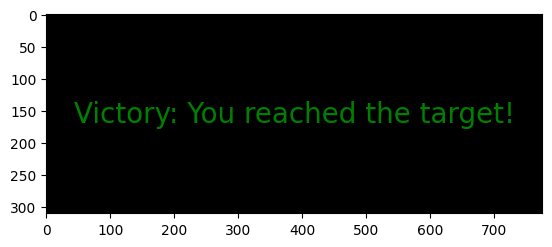

In [27]:
#Create our environment specifying the Map and what keys we have to observe 
env = gym.make("MiniHack-ExploreMaze-Hard-Mapped-v0", observation_keys=("chars", "pixel", "blstats", "message"))
state = env.reset()

plt.imshow(state['pixel'][25:500, :775])

game_map = state['chars']
game = state['pixel']
game_stats = state['blstats']
game_mex = state['message']

game_map = np.array(game_map)

start = get_player_location(game_map)
target = get_target_location(game_map)
hp = game_stats[6]
print("Agent position:", start)
print("Target position:", target)


# Add Game Over function
def display_game_over():
    plt.text(0.5, 0.5, "Game Over: You were killed by monsters!", 
             fontsize=20, ha='center', va='center', color='red', transform=plt.gca().transAxes)

# Add ictory function
def display_victory():
    plt.text(0.5, 0.5, "Victory: You reached the target!", 
             fontsize=20, ha='center', va='center', color='green', transform=plt.gca().transAxes)

# Starting of the simulation
population_size = 20
step_limit = 200
population = genetic_algorithm.generate_initial_population(game_map, start, target, population_size, step_limit)

#path = genetic_algorithm.genetic_algorithm(game_map, start, target, population)
path = bfs(game_map, start, target)

actions = actions_from_path(start, path[1:])

print(game_mex)

image = plt.imshow(game[25:500, :775])
for action in actions:
    s, _, done, _ = env.step(action)  # `done` say to us when the simulation is over
    image.set_data(s['pixel'][25:500, :775])

    print(hp)
    
    
    # If the simulation is done
    if done:
        # If player's hp are equal to 0 it means that he is dead
        if hp == 0: 
            display_game_over()
            break  # Interrupt the smulation

        # Else you have won    
        display_victory()
        break  # Interrupt the smulation


    # Update the game visualization
    display.display(plt.gcf())
    display.clear_output(wait=True)